Q1. What is a RESTful API?

A RESTful API follows the principles of REST (Representational State Transfer).
It allows communication between systems using standard HTTP methods like GET, POST, PUT, DELETE.
It uses stateless operations and often returns data in JSON format.

Q2. Explain the concept of API specification.

An API specification defines how APIs should behave and communicate.
It includes details like endpoints, request/response formats, and authentication.
Popular formats include OpenAPI (Swagger).

Q3. What is Flask, and why is it popular for building APIs?

Flask is a lightweight Python web framework.
It's popular because it's simple, flexible, and easy to use for creating APIs.
It supports extensions and has minimal setup.



Q4. What is routing in Flask?

Routing maps URLs to functions in Flask.
When a user visits a URL, Flask calls the linked function.
Routes are defined using the @app.route() decorator.



Q5. How do you create a simple Flask application?

from flask import Flask  
app = Flask(__name__)  

@app.route('/')  
def hello():  
    return "Hello, World!"  



Q6. What are HTTP methods used in RESTful APIs?
Common HTTP methods include:

GET: Retrieve data

POST: Submit data

PUT: Update data

DELETE: Remove data

Q7. What is the purpose of the @app.route() decorator in Flask?

It binds a URL path to a view function.
For example, @app.route('/home') means Flask will call that function when /home is visited.

Q8. What is the difference between GET and POST HTTP methods?

GET retrieves data without changing anything.
POST sends data to the server to create or update something.
GET shows data in the URL; POST hides it in the body.

Q9. How do you handle errors in Flask APIs?

You can use Flask’s @app.errorhandler() decorator.
It helps return custom error messages (e.g., 404 or 500).
You can also use try-except blocks inside your views.

Q10. How do you connect Flask to a SQL database?

Use Flask-SQLAlchemy for easy integration.
You define models in Python, and SQLAlchemy manages the database.
It supports SQLite, MySQL, PostgreSQL, etc.



Q11. What is the role of Flask-SQLAlchemy?

It simplifies database integration in Flask.
It provides ORM (Object Relational Mapping) for interacting with the database using Python classes.

Q12. What are Flask blueprints, and how are they useful?

Blueprints organize large Flask apps into components.
They allow you to group routes, templates, and static files.
This improves modularity and code reusability.

Q13. What is the purpose of Flask's request object?

It lets you access incoming request data.
You can use request.args, request.form, or request.json to read query strings, form data, or JSON.



Q14. How do you create a RESTful API endpoint using Flask?

Define a route using @app.route() and specify methods like GET or POST.
Return a JSON response using jsonify().

Q15. What is the purpose of Flask’s jsonify() function?

It converts Python data (like dictionaries) to JSON format.
This is useful for sending structured responses in APIs.

Q16. Explain Flask’s url_for() function.

url_for() builds a URL for a view function using its name.
It helps avoid hardcoding URLs and supports dynamic paths.

Q17. How does Flask handle static files (CSS, JavaScript, etc.)?

Flask serves static files from the static/ folder.
Use url_for('static', filename='style.css') in templates to reference them.

Q18. What is an API specification, and how does it help in building a Flask API?

It documents the structure, endpoints, and rules of an API.
Tools like Swagger can generate interactive docs.
It helps developers understand and test the API.



Q19. What are HTTP status codes, and why are they important in a Flask API?

They indicate the result of an HTTP request.
For example, 200 means success, 404 means not found, and 500 means server error.
They help clients understand API responses.



Q20. How do you handle POST requests in Flask?

Use @app.route('/example', methods=['POST']).
Access data using request.form or request.json depending on content type.

Q21. How would you secure a Flask API?

Use HTTPS, authentication (JWT, API keys), and validation.
Implement rate limiting and handle errors securely to prevent attacks.



Q22. What is the significance of the Flask-RESTful extension?

Flask-RESTful simplifies building REST APIs.
It offers tools like Resource classes and built-in request parsing.

Q23. What is the role of Flask’s session object?

It stores data for a user session between requests.
Flask encrypts it and stores it in a cookie on the client side.

Practical

#1 How do you create a basic Flask application?

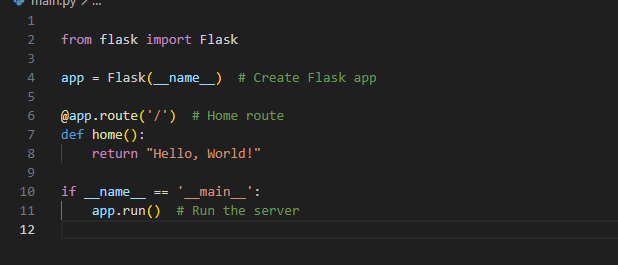

In [ ]:
2 How do you serve static files like images or CSS in Flask?
from flask import Flask, render_template

# Create Flask app instance
app = Flask(__name__)

# Home route
@app.route('/')
def hello():
    return render_template('index.html')  # Renders HTML page

# Run the app
if __name__ == '__main__':
    app.run(debug=True)
#html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Hello World</title>
    <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
</head>
<body>
    <h1>Hello, World from Flask!</h1>
    <p>This is a styled Flask web page using a template and static CSS.</p>
</body>
</html>



In [1]:
#3 How do you define different routes with different HTTP methods in Flask?
from flask import Flask, request

app = Flask(__name__)

# This route accepts GET requests
@app.route('/')
def home():
    return "Welcome to the Home Page (GET request)"

# This route accepts both GET and POST
@app.route('/submit', methods=['GET', 'POST'])
def submit():
    if request.method == 'POST':
        return "Data submitted via POST!"
    else:
        return "Submit something using POST."

if __name__ == '__main__':
    app.run(debug=True)



#4 How do you render HTML templates in Flask?

from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Renders index.html from templates folder

if __name__ == '__main__':
    app.run(debug=True)



#5 How can you generate URLs for routes in Flask using url_for?
from flask import Flask, url_for, redirect

app = Flask(__name__)

@app.route('/')
def home():
    return '<a href="' + url_for('about') + '">Go to About</a>'

@app.route('/about')
def about():
    return "This is the About page."

if __name__ == '__main__':
    app.run(debug=True)


#6 How do you handle forms in Flask?
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def form():
    if request.method == 'POST':
        name = request.form['name']
        return f"<h2>Hello, {name}!</h2>"
    return render_template('form.html')

if __name__ == '__main__':
    app.run(debug=True)

#htlm
<!DOCTYPE html>
<html>
<head>
    <title>Flask Form Example</title>
</head>
<body>
    <h1>Enter Your Name</h1>
    <form method="POST" action="/">
        <input type="text" name="name" required>
        <button type="submit">Submit</button>
    </form>
</body>
</html>



#7  How can you validate form data in Flask?
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def form():
    error = None
    if request.method == 'POST':
        name = request.form.get('name')
        if not name or len(name) < 3:
            error = "Name must be at least 3 characters long."
        else:
            return f"<h2>Welcome, {name}!</h2>"
    return render_template('form.html', error=error)

if __name__ == '__main__':
    app.run(debug=True)

# html
<!DOCTYPE html>
<html>
<head>
    <title>Validation Example</title>
</head>
<body>
    <h1>Enter Your Name</h1>
    {% if error %}
        <p style="color: red;">{{ error }}</p>
    {% endif %}
    <form method="POST" action="/">
        <input type="text" name="name" required>
        <button type="submit">Submit</button>
    </form>
</body>
</html>


#8 M How do you manage sessions in Flask?
from flask import Flask, session, redirect, url_for, request, render_template

app = Flask(__name__)
app.secret_key = 'your_secret_key'  # Required to use sessions

@app.route('/')
def index():
    username = session.get('username')
    return render_template('index.html', username=username)

@app.route('/login', methods=['POST'])
def login():
    session['username'] = request.form['username']
    return redirect(url_for('index'))

@app.route('/logout')
def logout():
    session.pop('username', None)
    return redirect(url_for('index'))

if __name__ == '__main__':
    app.run(debug=True)
#html
<!DOCTYPE html>
<html>
<head>
    <title>Session Example</title>
</head>
<body>
    {% if username %}
        <h2>Welcome, {{ username }}!</h2>
        <a href="{{ url_for('logout') }}">Logout</a>
    {% else %}
        <form method="POST" action="{{ url_for('login') }}">
            <label>Username:</label>
            <input type="text" name="username" required>
            <button type="submit">Login</button>
        </form>
    {% endif %}
</body>
</html>


#9 How do you redirect to a different route in Flask?

from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Home Page!"

@app.route('/go-to-about')
def go_to_about():
    return redirect(url_for('about'))  # Redirect to /about route

@app.route('/about')
def about():
    return "This is the About Page."

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
#10 How do you handle errors in Flask (e.g., 404)?
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the Home Page!"

# Custom 404 Error Handler
@app.errorhandler(404)
def page_not_found(error):
    return render_template('404.html'), 404

if __name__ == '__main__':
    app.run(debug=True)
#html
<!DOCTYPE html>
<html>
<head>
    <title>Page Not Found</title>
</head>
<body>
    <h1>404 - Page Not Found</h1>
    <p>The page you're looking for doesn't exist.</p>
    <a href="/">Go back home</a>
</body>
</html>


#11  How do you structure a Flask app using Blueprints?
from flask import Flask
from main.routes import main_bp  # Import blueprint

app = Flask(__name__)
app.register_blueprint(main_bp)  # Register blueprint

if __name__ == '__main__':
    app.run(debug=True)
#Blueprint
from flask import Blueprint, render_template

main_bp = Blueprint('main_bp', __name__, template_folder='templates')

@main_bp.route('/')
def main_home():
    return render_template('main_home.html')


In [ ]:
#12 How do you define a custom Jinja filter in Flask?
from flask import Flask, render_template

app = Flask(__name__)

# ✅ Define custom Jinja filter
@app.template_filter('reverse')
def reverse_string(s):
    return s[::-1]

@app.route('/')
def home():
    return render_template('index.html', name='Flask')

if __name__ == '__main__':
    app.run(debug=True)
<!DOCTYPE html>
<html>
<head>
    <title>Custom Jinja Filter</title>
</head>
<body>
    <h2>Original: {{ name }}</h2>
    <h2>Reversed: {{ name | reverse }}</h2>
</body>
</html>



In [ ]:
#13 How can you redirect with query parameters in Flask?
from flask import Flask, redirect, url_for, request

app = Flask(__name__)

@app.route('/')
def home():
    # Redirect with query parameters
    return redirect(url_for('greet', name='Alex', age=25))

@app.route('/greet')
def greet():
    # Get query parameters
    name = request.args.get('name')
    age = request.args.get('age')
    return f"Hello, {name}! You are {age} years old."

if __name__ == '__main__':
    app.run(debug=True)



In [ ]:
#14  How do you return JSON responses in Flask?

from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/api/user')
def get_user():
    user = {
        'id': 1,
        'name': 'Alex',
        'email': 'alex@example.com'
    }
    return jsonify(user)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
#15 How do you capture URL parameters in Flask?
from flask import Flask

app = Flask(__name__)

@app.route('/user/<username>')
def show_user(username):
    return f"Hello, {username}!"
